## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# **Importing**

In [1]:
#importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#importing dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
hotel_df = pd.read_csv('///content/drive/MyDrive/Hotel Bookings.csv')

In [4]:
#taking a look to see
hotel_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [6]:
hotel_df.shape

(119390, 32)

In [7]:
hotel_df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [9]:
#Now lets check how many cells are missing from our dataset.
hotel_df.isnull().sum() 

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [11]:
# We delete agent and company columns
hotel_df=hotel_df.drop(['agent','company'],axis=1)

In [12]:
# We delete rows with empty cells
hotel_df = hotel_df.dropna(axis = 0)

In [13]:
# We delete days_in_waiting_list column
hotel_df = hotel_df.drop(labels='days_in_waiting_list', axis=1)

In [14]:
#Lets check again the missing values
hotel_df.isnull().sum() 


hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [16]:
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,5400.000000,8.000000,5.000000


# Here we can see some outliers

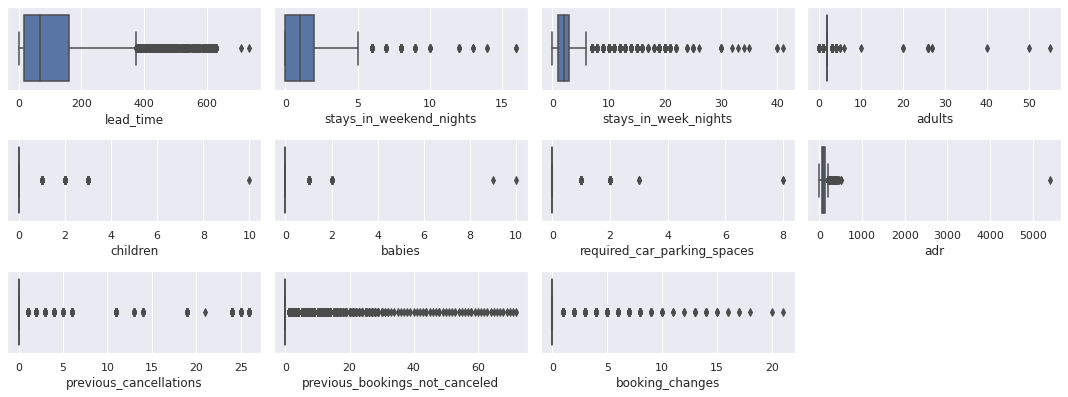

In [111]:
columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'required_car_parking_spaces', 'adr', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes']
n = 1
plt.figure(figsize=(15,7))
for column in columns:
  plt.subplot(4,4,n)
  n = n+1
  sns.boxplot(hotel_df[column])
  plt.tight_layout()

In [112]:
#We remove the outliers by using conditionals to get and update these values
hotel_df.loc[hotel_df.lead_time > 500, 'lead_time'] = 500
hotel_df.loc[hotel_df.stays_in_weekend_nights >=  5, 'stays_in_weekend_nights'] = 5
hotel_df.loc[hotel_df.adults > 4, 'adults'] = 4
hotel_df.loc[hotel_df.previous_bookings_not_canceled > 0, 'previous_bookings_not_canceled'] = 1
hotel_df.loc[hotel_df.previous_cancellations > 0, 'previous_cancellations'] = 1
hotel_df.loc[hotel_df.stays_in_week_nights > 10, 'stays_in_week_nights'] = 10
hotel_df.loc[hotel_df.booking_changes > 5, 'booking_changes'] = 5
hotel_df.loc[hotel_df.babies > 8, 'babies'] = 0
hotel_df.loc[hotel_df.required_car_parking_spaces > 5, 'required_car_parking_spaces'] = 0
hotel_df.loc[hotel_df.children > 8, 'children'] = 0
hotel_df.loc[hotel_df.adr > 1000, 'adr'] = 1000

We remove the outliers. Our Data is clean now.

# **EXPLORATORY DATA ANALYSIS (EDA)**

In [21]:
#Lets merge ‘children’ and ‘babies’ columns into ‘kids’ column
hotel_df['kids'] = hotel_df.children + hotel_df.babies    

In [22]:
#Combine total mumbers by adding kids and adults
hotel_df['total_members'] = hotel_df.kids + hotel_df.adults

In [23]:
#convert the datatypes to string
hotel_df['arrival_date_year'] = hotel_df['arrival_date_year'].astype('str')
hotel_df['arrival_date_month'] = hotel_df['arrival_date_month'].astype('str')
hotel_df['arrival_date_day_of_month'] = hotel_df['arrival_date_day_of_month'].astype('str')
hotel_df['is_canceled'] = hotel_df['is_canceled'].astype('str')
hotel_df['is_repeated_guest'] = hotel_df['is_repeated_guest'].astype('str')

In [24]:
#Lets convert arrival date to datetime
hotel_df['arrival_date'] = hotel_df['arrival_date_day_of_month'] + '-' + hotel_df['arrival_date_month'] + '-' + hotel_df['arrival_date_year']
hotel_df['arrival_date'] = pd.to_datetime(hotel_df['arrival_date'], errors='coerce')

# **1. Hotel Type**

In [26]:
hotel_df.hotel.value_counts(normalize=True)

City Hotel      0.666975
Resort Hotel    0.333025
Name: hotel, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


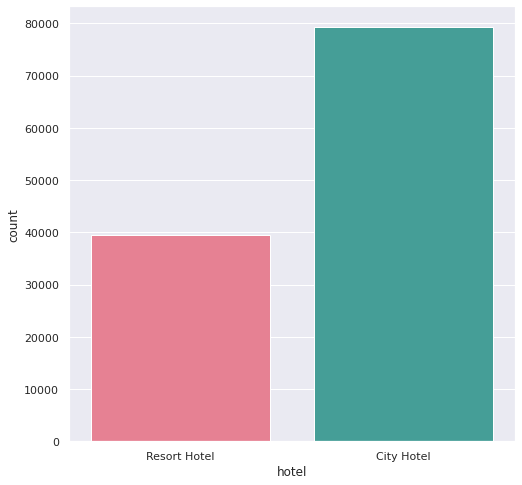

In [31]:
plt.figure(figsize=(8,8))
sns.countplot(hotel_df['hotel'], palette='husl')
plt.show()

# **2. Reservation Status**

In [32]:
hotel_df.reservation_status.value_counts(normalize=True)


Check-Out    0.628648
Canceled     0.361234
No-Show      0.010118
Name: reservation_status, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


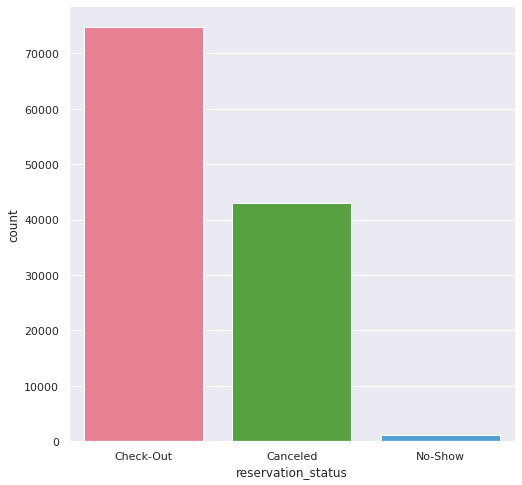

In [33]:
plt.figure(figsize=(8,8))
sns.countplot(hotel_df['reservation_status'], palette='husl')
plt.show()

# **3. Total Members**

In [34]:
hotel_df.total_members.value_counts(normalize=True)

2.0     0.688658
1.0     0.187463
3.0     0.088134
4.0     0.033020
0.0     0.001430
5.0     0.001152
26.0    0.000042
12.0    0.000017
27.0    0.000017
20.0    0.000017
10.0    0.000017
40.0    0.000008
50.0    0.000008
55.0    0.000008
6.0     0.000008
Name: total_members, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


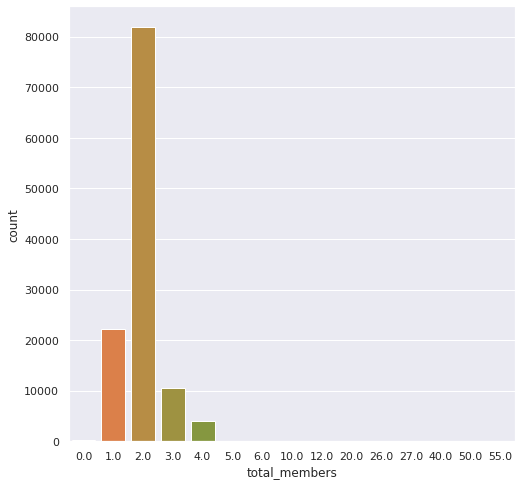

In [41]:
plt.figure(figsize=(8,8))
sns.countplot(hotel_df['total_members'], palette='husl')
plt.show()

# **4. Cancelled  Booking**

In [42]:
print('Total Bookings cancelled')
print(hotel_df.is_canceled.value_counts())
print('Cancelation percentage')
print(hotel_df.is_canceled.value_counts(normalize=True))

Total Bookings cancelled
0    74745
1    44153
Name: is_canceled, dtype: int64
Cancelation percentage
0    0.628648
1    0.371352
Name: is_canceled, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


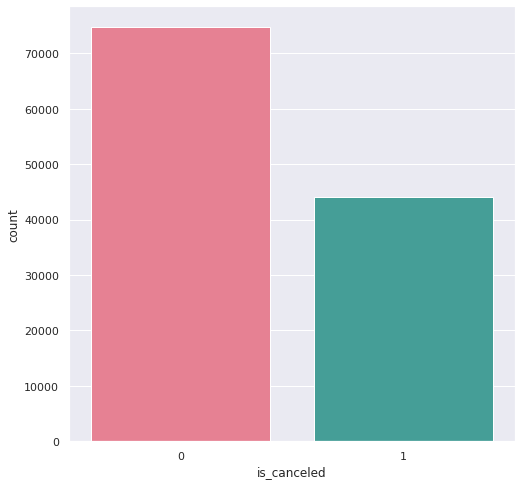

In [44]:
plt.figure(figsize=(8,8))
sns.countplot(hotel_df['is_canceled'], palette='husl')
plt.show()

# **5.Distribution Channel**

In [71]:
hotel_df.distribution_channel.value_counts(normalize=True)

TA/TO        0.821965
Direct       0.121810
Corporate    0.054593
GDS          0.001623
Undefined    0.000008
Name: distribution_channel, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


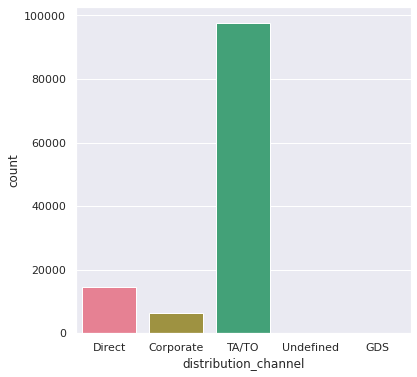

In [73]:
plt.figure(figsize=(6,6))
sns.countplot(hotel_df['distribution_channel'], palette='husl')
plt.show()

# **6.Deposit Type**

In [45]:
hotel_df.deposit_type.value_counts(normalize=True)

No Deposit    0.876070
Non Refund    0.122567
Refundable    0.001363
Name: deposit_type, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


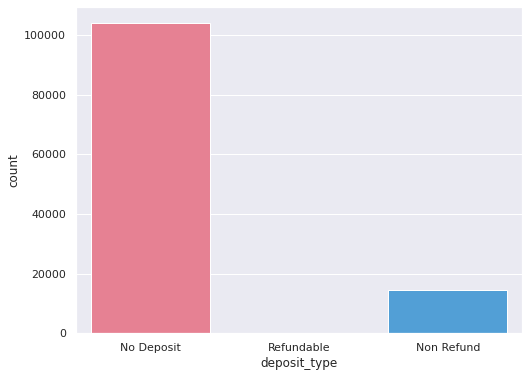

In [48]:
plt.figure(figsize=(8,6))
sns.countplot(hotel_df['deposit_type'], palette='husl')
plt.show()

# **7.Booking Changes**

In [50]:
hotel_df.booking_changes.value_counts(normalize=True)

0     0.848643
1     0.106301
2     0.031876
3     0.007780
4     0.003154
5     0.000992
6     0.000530
7     0.000261
8     0.000143
9     0.000067
10    0.000050
13    0.000042
14    0.000042
15    0.000025
16    0.000017
17    0.000017
12    0.000017
11    0.000017
20    0.000008
21    0.000008
18    0.000008
Name: booking_changes, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


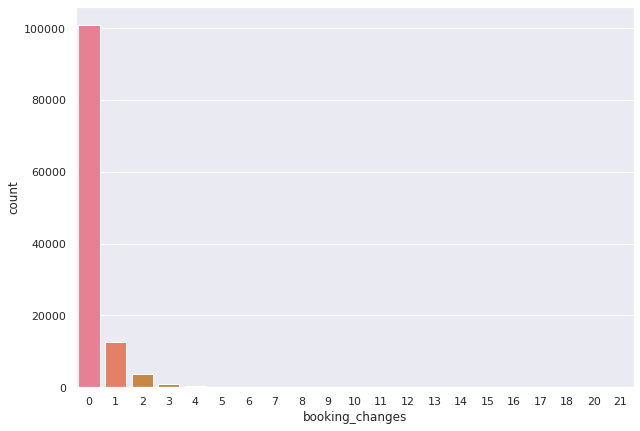

In [65]:
plt.figure(figsize=(10,7))
sns.countplot(hotel_df['booking_changes'], palette='husl')
plt.show()

# **8.Customer Types**

In [55]:
hotel_df.customer_type.value_counts(normalize=True)

Transient          0.750004
Transient-Party    0.210920
Contract           0.034281
Group              0.004794
Name: customer_type, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


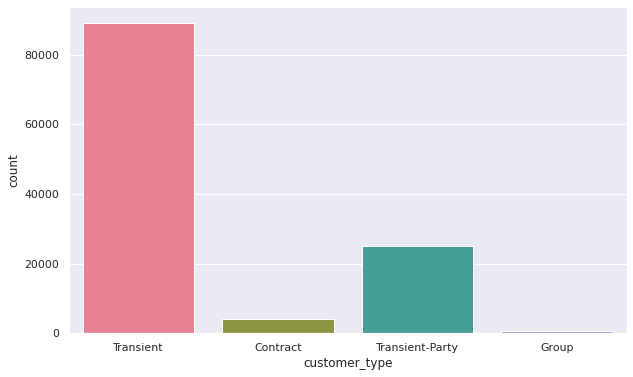

In [64]:
plt.figure(figsize=(10,6))
sns.countplot(hotel_df['customer_type'], palette='husl')
plt.show()


# **9.Repeated Guest**

In [57]:
hotel_df.is_repeated_guest.value_counts(normalize=True)

0    0.967989
1    0.032011
Name: is_repeated_guest, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


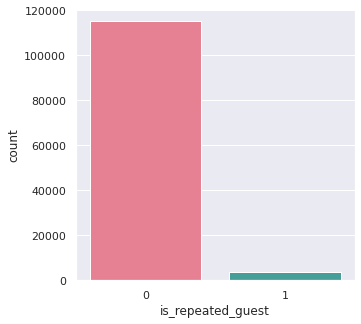

In [63]:
plt.figure(figsize=(5,5))
sns.countplot(hotel_df['is_repeated_guest'], palette='husl')
plt.show()

# **10.Reserved Room Type**

In [59]:
hotel_df.reserved_room_type.value_counts(normalize=True)

A    0.719953
D    0.161256
E    0.054643
F    0.024307
G    0.017519
B    0.009369
C    0.007830
H    0.005055
L    0.000050
P    0.000017
Name: reserved_room_type, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


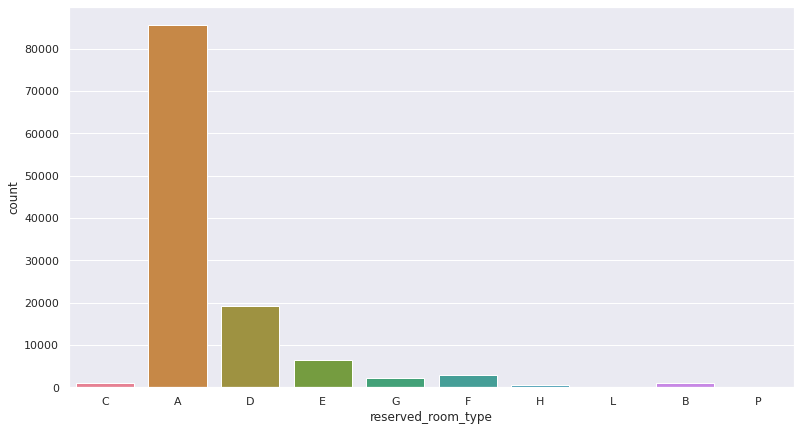

In [61]:
plt.figure(figsize=(13,7))
sns.countplot(hotel_df['reserved_room_type'], palette='husl')
plt.show()

# **11.Assigned Room Type**

In [66]:
hotel_df.assigned_room_type.value_counts(normalize=True)

A    0.621230
D    0.211660
E    0.065081
F    0.031388
G    0.021354
C    0.019798
B    0.018158
H    0.005955
I    0.003003
K    0.002347
P    0.000017
L    0.000008
Name: assigned_room_type, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


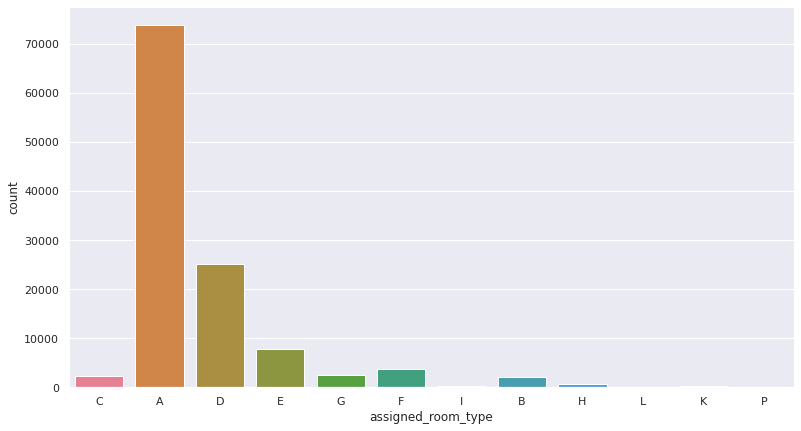

In [67]:
plt.figure(figsize=(13,7))
sns.countplot(hotel_df['assigned_room_type'], palette='husl')
plt.show()

# **12.Market Segment**

In [68]:
hotel_df.market_segment.value_counts(normalize=True)

Online TA        0.474373
Offline TA/TO    0.203199
Groups           0.166580
Direct           0.104695
Corporate        0.042986
Complementary    0.006173
Aviation         0.001993
Name: market_segment, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


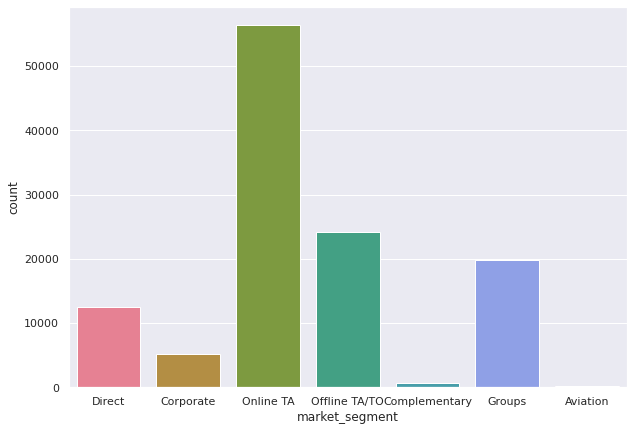

In [69]:
plt.figure(figsize=(10,7))
sns.countplot(hotel_df['market_segment'], palette='husl')
plt.show()

# **13.Meal**

In [76]:
hotel_df.meal.value_counts(normalize=True)

BB           0.772620
HB           0.121398
SC           0.089472
Undefined    0.009798
FB           0.006712
Name: meal, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


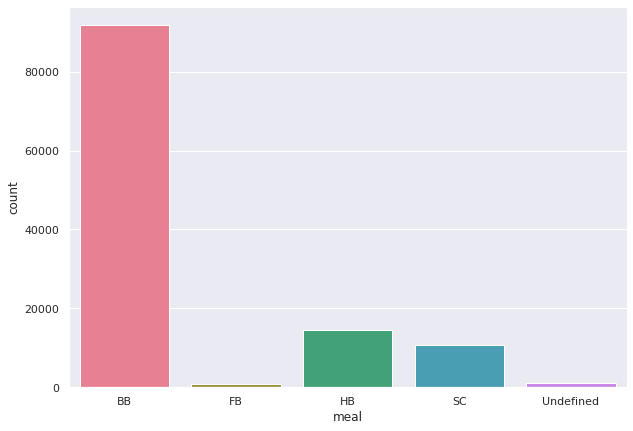

In [77]:
plt.figure(figsize=(10,7))
sns.countplot(hotel_df['meal'], palette='husl')
plt.show()

# **14.Country**

In [113]:
hotel_df.country.value_counts(normalize=True)

PRT    0.408636
GBR    0.102012
FRA    0.087596
ESP    0.072062
DEU    0.061288
         ...   
DJI    0.000008
BWA    0.000008
HND    0.000008
VGB    0.000008
NAM    0.000008
Name: country, Length: 177, dtype: float64

# **14.Year**

In [78]:
hotel_df.arrival_date_year.value_counts(normalize=True)

2016    0.474651
2017    0.341503
2015    0.183847
Name: arrival_date_year, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


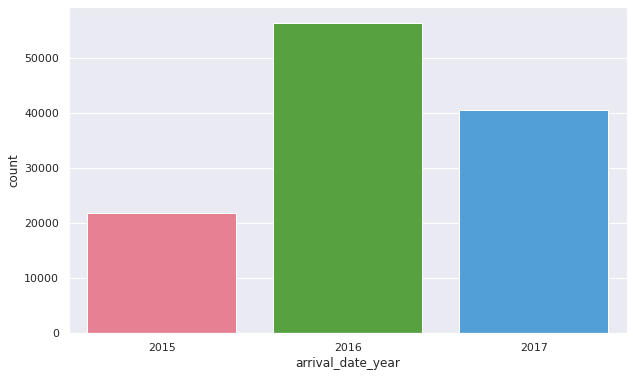

In [81]:
plt.figure(figsize=(10,6))
sns.countplot(hotel_df['arrival_date_year'], palette='husl')
plt.show()

# **15.Month**

In [82]:
hotel_df.arrival_date_month.value_counts(normalize=True)

August       0.116503
July         0.106209
May          0.099068
October      0.093315
April        0.092895
June         0.091902
September    0.088033
March        0.081911
February     0.067385
November     0.056788
December     0.056586
January      0.049404
Name: arrival_date_month, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


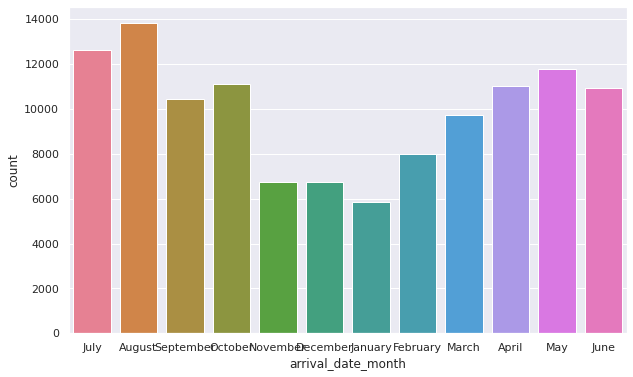

In [83]:
plt.figure(figsize=(10,6))
sns.countplot(hotel_df['arrival_date_month'], palette='husl')
plt.show()

# **16.Average Daily Rate (ADR)**

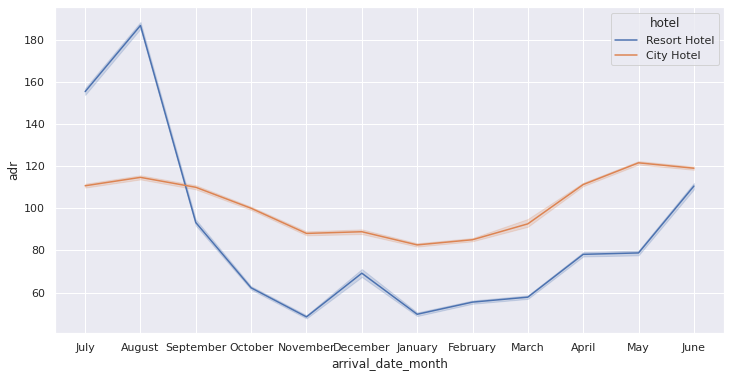

In [84]:
plt.figure(figsize=(12,6))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data= hotel_df)
plt.show()

# **Let’s plot the heatmap and see the correlation**

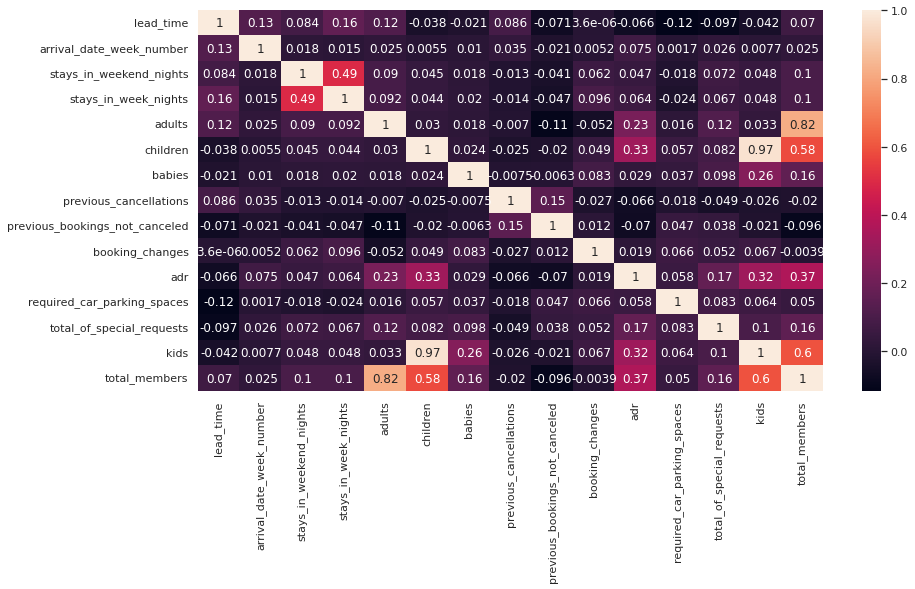

In [95]:
## Plot the heatmap to see correlation with columns
fig, ax = plt.subplots(figsize=(14,7))
sns.heatmap(hotel_df.corr(), annot=True, ax=ax);

#  Which are the months of highest and least occupation?

In [86]:
hotel_df.arrival_date_month.value_counts(normalize=True)

August       0.116503
July         0.106209
May          0.099068
October      0.093315
April        0.092895
June         0.091902
September    0.088033
March        0.081911
February     0.067385
November     0.056788
December     0.056586
January      0.049404
Name: arrival_date_month, dtype: float64

# What is the most popular meal package?

In [87]:
hotel_df.meal.value_counts(normalize=True)

BB           0.772620
HB           0.121398
SC           0.089472
Undefined    0.009798
FB           0.006712
Name: meal, dtype: float64

# Which is the most reserved room type?

In [88]:
hotel_df.reserved_room_type.value_counts(normalize=True)

A    0.719953
D    0.161256
E    0.054643
F    0.024307
G    0.017519
B    0.009369
C    0.007830
H    0.005055
L    0.000050
P    0.000017
Name: reserved_room_type, dtype: float64

# How many bookings changes have been done during the studied period?

In [90]:
hotel_df.booking_changes.sum()

26298

# How many people have been registered in the hotel?

In [91]:
hotel_df.total_members.sum()

234294.0

# What is the most common customer type?

In [92]:
hotel_df.customer_type.value_counts(normalize=True)

Transient          0.750004
Transient-Party    0.210920
Contract           0.034281
Group              0.004794
Name: customer_type, dtype: float64

# **Conclusion**

 
*   In this exercise we see if there is any missing values present or not.

*   the majority of reservations are for city hotels.


*    The majority of guests come from western europe countries.



*   The number of repeated guests is too low.

*   The majority of reservations converts into successful transactions.







